In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)

In [2]:
all_AVA_muts = pd.read_pickle("../data/ava/4_10_with_uniq_midpts.pkl")
display(len(all_AVA_muts), all_AVA_muts.head())

5676

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,imodulons,imodulon links,EC numbers,EC number links,products,product links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,coding (380‑400/1149 nt),nagA,NaN,1 124 1 1,True,"(702352, 702372)",{ECK120000625},"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",False,False,{},{},{},{},{},True,"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",{'ECK120000625': ['ECK120000625']},"[{'name': 'nagBAC-umpH', 'RegulonDB ID': 'ECK1...",{'ECK125162049': ['ECK120000625']},"[{'name': 'PhoP', 'significantly associated co...","{'NagC': ['ECK125162049'], 'PhoP': ['ECK125162...","[{'name': 'Galactose metabolism', 'significant...","{'Galactose metabolism': ['ECK125162049'], 'Am...",[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,"[{'name': 'NagC/TyrR', 'significantly associat...",{'NagC/TyrR': ['nagBAC-umpH']},"[{'name': '3.5.1.25', 'significantly associate...","{'3.5.1.25': ['ECK125162049', 'ECK125162049']}",[{'name': 'N-acetylglucosamine-6-phosphate dea...,{'N-acetylglucosamine-6-phosphate deacetylase ...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,R110G (CGT→GGT),clsA,NaN,1 124 1 1,True,"(1308318, 1308318)",{ECK120001556},"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",False,False,{},{},{},{},{},True,"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",{'ECK120001556': ['ECK120001556']},"[{'name': 'clsA-yciU', 'RegulonDB ID': 'ECK125...",{'ECK125147415': ['ECK120001556']},[],{},[],{},[{'name': 'Lipid transport and metabolism'}],{'Lipid transport and metabolism': ['ECK125147...,[],{},[],{},[],{},42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,None,rph,NaN,1 124 1 1,True,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",False,False,{},{},{},{ECK125144791},{},True,"[{'name': 'rph-pyrE attenuator terminator', 'R...","{'ECK120000854': ['ECK120000854'], 'ECK1200007...","[{'name': 'rph-pyrE', 'RegulonDB ID': 'ECK1200...","{'ECK120014627': ['ECK120000854', 'ECK12000079...",[],{},"[{'name': 'Pyrimidine metabolism', 'significan...","{'Pyrimidine metabolism': ['ECK120014627'], 'D...",[{'name': 'Nucleotide transport and metabolism'}],{'Nucleotide transport and metabolism': ['ECK1...,"[{'name': 'purR-KO', 'significantly associated...","{'purR-KO': ['rph-pyrE', 'rph-pyrE']}","[{'name': '2.4.2.10', 'significantly associate...","{'2.4.2.10': ['ECK120014627', 'ECK120014627']}",[{'name': 'Orotate phosphoribosyltransferase (...,{'Orotate phosphoribosyltransferase (EC 2.4.2....,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,A734V (GCG→GTG),rpoC,NaN,1 124 1 1,True,"(4187550, 4187550)",{ECK120000886},"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",False,False,{},{},{},{},{},True,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",{'ECK120000886': ['ECK120000886']},"[{'name': 'rplKAJL-rpoBC', 'RegulonDB ID': 'EC...",{'ECK120016992': ['ECK120000886']},[],{},"[{'name': 'Purine metabolism', 'significantly ...","{'Purine metabolism': ['ECK120016992'], 'Pyrim...",[{'name': 'Transcription'}],{'Transcription': ['ECK120016992']},"[{'name': 'translation', 'significantly associ...",{'translation': ['rplKAJL-rpoBC']},"[{'name': '2.7.7.6'

In [3]:
FEAT_TYPES = {
    'RBS',
    'TFBS',
    'attenuator terminator',
    'gene',
    'promoter',
    'terminator',
    'intergenic',
    'operons',
    'regulators',
    'pathways',
#     'imodulons',  # currently not including for the publication
#     'EC numbers', # currently not including for the publication
}

FEAT_LINK_COLS = {
    'operon links',
    'regulator links',
    'pathway links',
#     'imodulon links',  # currently not including for the publication
#     'EC number links',  # currently not including for the publication
}

FEAT_LINK_TO_TYPE = {
    'operon links': "operons",
    'regulator links': 'regulators',
    'pathway links': 'pathways',
#     'imodulon links': 'imodulons',  # currently not including for the publication
#     'EC number links': 'EC numbers'  # currently not including for the publication
}

In [4]:
obs_mut_feat_cnt_d = {ft:0 for ft in FEAT_TYPES}

# Genomic features don't have link dictionaries,
for _, m in all_AVA_muts.iterrows():
    for f_d in m["genomic features"]:
        ft = f_d["feature type"]
        if ft == "unknown":
            ft = "intergenic"
        obs_mut_feat_cnt_d[ft] += 1

# Count hits for high-level features involves counting the
# amount of links from the previously level to the current
# using the link dictionaries.
for _, m in all_AVA_muts.iterrows():
    for ftlc in FEAT_LINK_COLS:
        fl_d = m[ftlc]
        if fl_d != None:
            ft = FEAT_LINK_TO_TYPE[ftlc]
            obs_mut_feat_cnt_d[ft] += len(fl_d.values())
            
obs_mut_feat_cnt_d

{'RBS': 45,
 'terminator': 113,
 'attenuator terminator': 387,
 'promoter': 1661,
 'regulators': 6758,
 'TFBS': 691,
 'pathways': 3610,
 'intergenic': 456,
 'operons': 6421,
 'gene': 5981}

In [5]:
FEAT_TYPE_COL = {
    'genomic features',
    'operons',
    'regulators',
    'pathways',
#     'imodulons',
#     'EC numbers',
}

unique_mut_feat_d = {ft:set() for ft in FEAT_TYPES}

for _, m in all_AVA_muts.iterrows():
    for ftc in FEAT_TYPE_COL:
        for f_d in m[ftc]:
            ft = ftc
            f_id = f_d['name']
            if ftc == "genomic features":
                ft = f_d["feature type"]
                f_id = f_d['RegulonDB ID']
                if ft == "unknown":
                    ft = "intergenic"
            if ftc == "operons":
                    f_id = f_d['RegulonDB ID']
            unique_mut_feat_d[ft].add(f_id)
# unique_mut_feat_d

In [6]:
# separating adding rows to DF so that can sort on unique feature count for barplot at the end of NB

obs_and_unique_feat_cnt_df = pd.DataFrame()
for ft in FEAT_TYPES:
#     obs_d = {"feature type":ft, "type": "observed mutation", "count": obs_mut_feat_cnt_d[ft]}
#     obs_and_unique_feat_cnt_df = obs_and_unique_feat_cnt_df.append(obs_d, ignore_index=True)
    unq_d = {"feature type":ft, "type": "unique mutated feature", "count": len(unique_mut_feat_d[ft])}
    obs_and_unique_feat_cnt_df = obs_and_unique_feat_cnt_df.append(unq_d, ignore_index=True)
obs_and_unique_feat_cnt_df.sort_values(by="count", ascending=False, inplace=True)

for ft in FEAT_TYPES:
    obs_d = {"feature type":ft, "type": "observed mutation", "count": obs_mut_feat_cnt_d[ft]}
    obs_and_unique_feat_cnt_df = obs_and_unique_feat_cnt_df.append(obs_d, ignore_index=True)

obs_and_unique_feat_cnt_df["count"] = obs_and_unique_feat_cnt_df["count"].astype(int)
obs_and_unique_feat_cnt_df

,count,feature type,type
0,1893,gene,unique mutated feature
1,1438,operons,unique mutated feature
2,624,promoter,unique mutated feature
3,254,TFBS,unique mutated feature
4,215,intergenic,unique mutated feature
5,183,regulators,unique mutated feature
6,125,pathways,unique mutated feature
7,119,attenuator terminator,unique mutated feature
8,37,terminator,unique mutated feature
9,13,RBS,unique mutated feature


In [7]:
obs_and_unique_feat_cnt_df.to_pickle("../data/obs_and_unique_feat_cnt_df.pkl")

In [8]:
obs_and_unique_feat_cnt_df["feature type"] = obs_and_unique_feat_cnt_df.apply(lambda r: r["feature type"].replace("regulators", "regulons") , axis=1)
# obs_and_unique_feat_cnt_df["feature type"] = obs_and_unique_feat_cnt_df.apply(lambda r: r["feature type"].replace("EC numbers", "reactions") , axis=1)  # currently not including for the publication
obs_and_unique_feat_cnt_df["feature type"] = obs_and_unique_feat_cnt_df.apply(lambda r: r["feature type"][:-1] if r["feature type"][-1] == 's' else r["feature type"] ,axis=1)

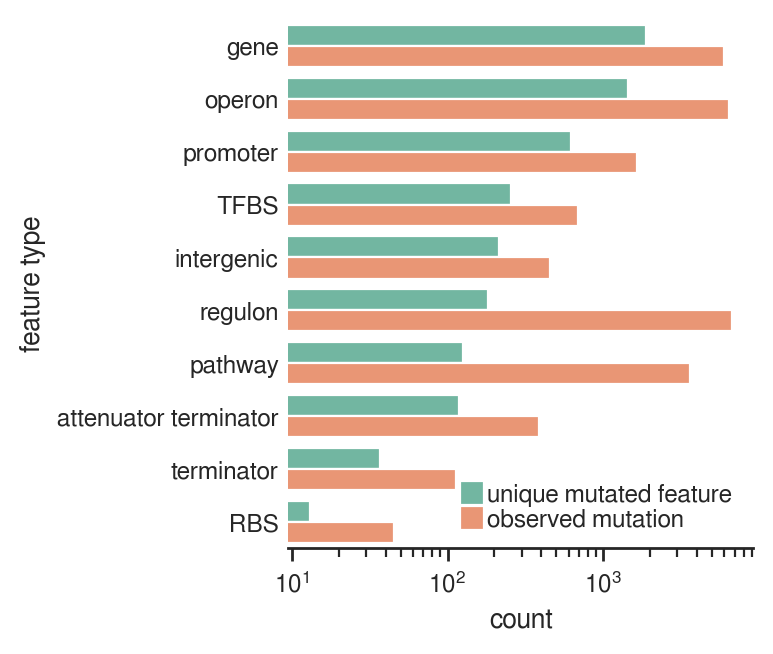

In [9]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_palette("Set2")
sns.set_context("paper")
sns.set_style("ticks")
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0
plt.rcParams['font.sans-serif'] = ["FreeSans"]


df = obs_and_unique_feat_cnt_df.copy()

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(3,3.5)
ax = sns.barplot(x="count", y="feature type", hue="type", data=df)

sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)
ax.legend(loc='lower right',
          bbox_to_anchor=(1, -0.01),
          frameon=False
         )
ax.tick_params(axis='y', which='major', length=0)
ax.set_xscale('log')

In [10]:
# for outputting to table in MS
df = pd.DataFrame(columns=["unique mutated feature", "observed mutation"], index=obs_and_unique_feat_cnt_df["feature type"].unique())
for _, r in obs_and_unique_feat_cnt_df.iterrows():
    df.at[r["feature type"], r["type"]] = r["count"]
geno_feats = {"gene", "promoter", "TFBS", "intergenic", 'attenuator terminator', 'terminator', 'RBS'}
high_level_feats = {'operon', 'reaction', 'regulon', 'pathway', 'imodulon'}
display(df.reindex(geno_feats).sort_values(by="unique mutated feature", ascending=False))
display(df.reindex(high_level_feats).sort_values(by="unique mutated feature", ascending=False))

,unique mutated feature,observed mutation
gene,1893,5981
promoter,624,1661
TFBS,254,691
intergenic,215,456
attenuator terminator,119,387
terminator,37,113
RBS,13,45


,unique mutated feature,observed mutation
operon,1438,6421
regulon,183,6758
pathway,125,3610
imodulon,NaN,NaN
reaction,NaN,NaN


In [11]:
from Bio import SeqIO


recs = [rec for rec in SeqIO.parse("../data/NC_000913_3.gb", "genbank")]

mob_sizes = dict()

for rec in recs:
    feats = [feat for feat in rec.features if feat.type == "mobile_element"]
    for feat in feats:
        for annot in feat.qualifiers["mobile_element_type"]:
            mob_name = annot.replace("insertion sequence:",'')
            if mob_name[-1].isdigit() == False:  # Removing annotations describing separate instances of a MOB.
                mob_name = mob_name[:-1]
            mob_size = len(feat.location)
            if mob_name not in mob_sizes.keys():  # Assuming that all MOBs have the same length.
                mob_sizes[mob_name] = mob_size
mob_sizes

{'IS186': 1345,
 'IS1': 768,
 'IS911': 335,
 'IS30': 1221,
 'IS5': 1195,
 'IS': 312,
 'IS3': 1255,
 'IS2': 1331,
 'IS609': 1748,
 'IS5L': 1195,
 'IS150': 1443,
 'IS4': 1426,
 'IS600': 327}

In [12]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from mutil.mut import get_mut_size, get_mob_size, is_genetic_mut, is_coding_mut, predict_mutation_effect_on_feature # is_frameshift, is_non_syn_SNP, is_disruptive_SNP


all_AVA_muts["genetic"] = all_AVA_muts["Details"].apply(is_genetic_mut)
all_AVA_muts["coding"] = all_AVA_muts["Details"].apply(is_coding_mut)
all_AVA_muts["mutation size"] = all_AVA_muts.apply(get_mut_size, axis=1)  # get_mut_size currently doesn't return MOB mut sizes. Isn't something currently necessary.

# TODO: integrate MOB size logic into get_mut_size
all_AVA_muts["mutation size"] = all_AVA_muts.apply(lambda r: get_mob_size(r["Sequence Change"], mob_sizes) if r["Mutation Type"] == "MOB" else r["mutation size"], axis=1)

In [13]:
def _set_geno_feat_effect(mut):
    for gf in mut["genomic features"]:
        gf["predicted mutation effect"] = predict_mutation_effect_on_feature(mut, gf)

all_AVA_muts.apply(lambda m: _set_geno_feat_effect(m), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
5671    None
5672    None
5673    None
5674    None
5675    None
Length: 5676, dtype: object

In [14]:
GENOMIC_FEAT_TYPES = {
    'RBS',
    'TFBS',
    'attenuator terminator',
    'gene',
    'promoter',
    'terminator',
    'unknown',
}

df = pd.DataFrame(
    columns={
        ("SNP", "synonymous"): 0, ("SNP", "nonsynonymous"): 0, ("SNP", "nonsynonymous"): 0, ("SNP", "truncation"): 0, ("SNP", "other"): 0,
        ("DEL", "truncation"): 0, ("DEL", "other"): 0,
        ("INS", "truncation"): 0, ("INS", "other"): 0,
        ("MOB", "truncation"): 0, ("MOB", "other"): 0,
        ("SUB", "other"): 0,
        ("AMP", "other"): 0,
    },
    index=GENOMIC_FEAT_TYPES)
df = df.fillna(0)


# counting genomic features doesn't require counting links
for _, m in all_AVA_muts.iterrows():
    for gf in m["genomic features"]:
        df.loc[gf["feature type"], (m["Mutation Type"], gf["predicted mutation effect"])] += 1
        
df = df.reindex([
    'gene',
    'promoter',
    'TFBS',
    'unknown',
    'attenuator terminator',
    'terminator',
    'RBS',
])

df

SNP                                       DEL  \
                      synonymous nonsynonymous truncation other truncation   
gene                         789          2420        162     0       1695   
promoter                       0             0          0   440        936   
TFBS                           0             0          0    62        598   
unknown                        0             0          0   270          0   
attenuator terminator          0             0          0    80        229   
terminator                     0             0          0    16         82   
RBS                            0             0          0     3         14   

                                   INS              MOB         SUB   AMP  
                      other truncation other truncation other other other  
gene                    298        317    27        149    34    89     1  
promoter                143          2    39         97     0     4     0  
TFBS                      8          0     2         21     0     0     0  
unknown                  97          0    50          0    36     3     0  
attenuator terminator    59          0    11          4     0     4     0  
terminator                5          0     7          2     0     1     0  
RBS                      28          0     0          0     0     0     0

In [15]:
df = pd.DataFrame(columns=["name", "feature type", "truncation", "other"])
for _, m in all_AVA_muts.iterrows():
    for f in m["genomic features"]:
        
        if f["RegulonDB ID"] not in df.index:
            srs = pd.Series({"name":f["name"] , "feature type":f["feature type"] ,"truncation":0, "other":0}, name=f["RegulonDB ID"])
            df = df.append(srs)
            
        if f["predicted mutation effect"] == "truncation":
            df.at[f["RegulonDB ID"], "truncation"] += 1
        else:
            df.at[f["RegulonDB ID"], "other"] += 1
df

,name,feature type,truncation,other
ECK120000625,nagA,gene,3,7
ECK120001556,clsA,gene,3,1
ECK125144791,rph-pyrE attenuator terminator,attenuator terminator,62,70
ECK120000854,rph,gene,66,3
ECK120000886,rpoC,gene,8,78
...,...,...,...,...
ECK120000173,cyoA,gene,1,0
ECK120000740,potA,gene,0,1
ECK120003502,ydiK,gene,0,1
ECK120001410,csrA,gene,0,1


In [16]:
df["feature type"] = df.apply(lambda r: "intergenic" if r["feature type"] == "unknown" else r["feature type"], axis=1)

In [17]:
df["total"] = df["other"] + df["truncation"]
df["other prop"] = df["other"] / df["total"]
df["truncation prop"] = df["truncation"] / df["total"]  # Since the mutations have to be one of two categories, as single proportion represents both
df

,name,feature type,truncation,other,total,other prop,truncation prop
ECK120000625,nagA,gene,3,7,10,0.7,0.3
ECK120001556,clsA,gene,3,1,4,0.25,0.75
ECK125144791,rph-pyrE attenuator terminator,attenuator terminator,62,70,132,0.530303,0.469697
ECK120000854,rph,gene,66,3,69,0.0434783,0.956522
ECK120000886,rpoC,gene,8,78,86,0.906977,0.0930233
...,...,...,...,...,...,...,...
ECK120000173,cyoA,gene,1,0,1,0,1
ECK120000740,potA,gene,0,1,1,1,0
ECK120003502,ydiK,gene,0,1,1,1,0
ECK120001410,csrA,gene,0,1,1,1,0


Text(0.5, 0, 'proportion of mutations\nto individual features that are truncations')

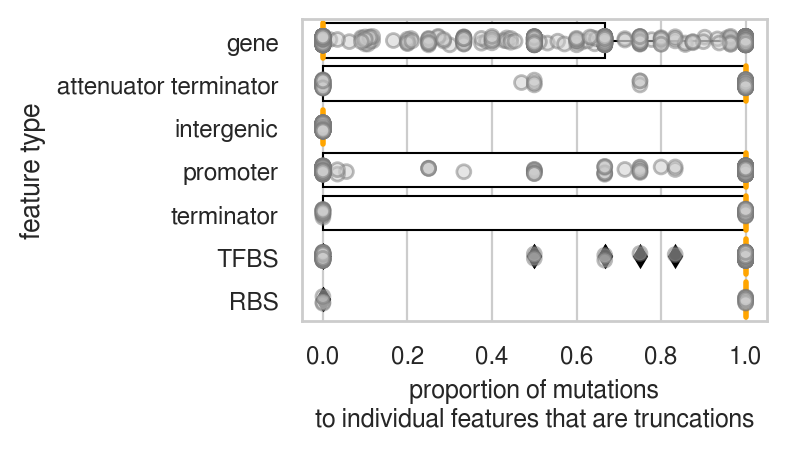

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_palette("muted")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'orange', 'linewidth': 2},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': 'd', 'markerfacecolor': "black", 'markeredgecolor': "black"}
}

plt.figure(figsize=(3, 2))
sns.boxplot(data=df, x="truncation prop", y="feature type",
            color="white",
            **boxplot_kwargs
           )
sns.stripplot(data=df, x="truncation prop", y="feature type",
              color="0.8",
              alpha=0.5, 
              linewidth=1,
#               facecolors=None
             )
ax.tick_params(axis='both', which='both', length=0)
plt.xlabel("proportion of mutations\nto individual features that are truncations", fontsize=9)

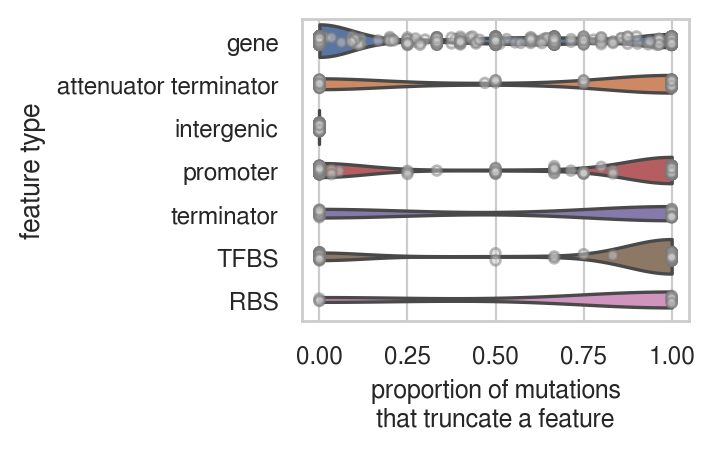

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

plt.figure(figsize=(2.5, 2))
df["truncation prop"] = df["truncation prop"].astype('float64')  # can only make the violinplot with this line
sns.violinplot(
    data=df,
    x="truncation prop",
    y="feature type",
#     color="white",
    cut=0,
    inner=None
)

sns.stripplot(
    data=df, x="truncation prop", y="feature type",
    color="0.8",
    alpha=0.5,
    linewidth=1,
    size=3.5
)

ax.tick_params(axis='both', which='both', length=0)
plt.xlabel("proportion of mutations\nthat truncate a feature", fontsize=9)

plt.savefig("../figs/gdmuts_f3s1.svg", format="svg")

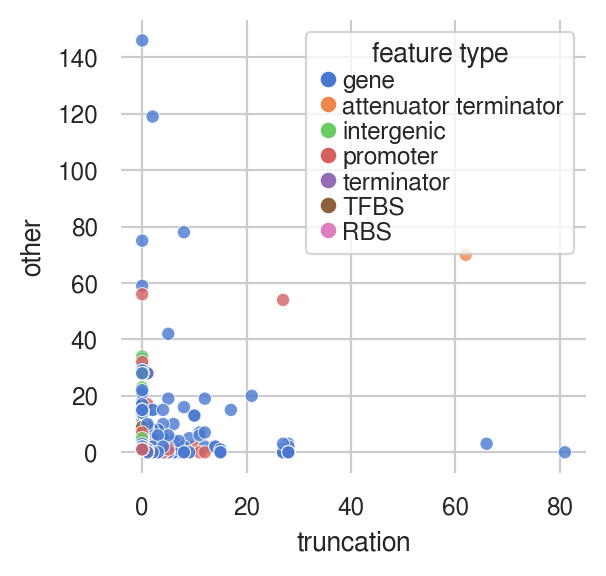

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_palette("muted")
sns.set_context("paper")
# sns.set_style("ticks")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


plt.figure(figsize=(3,3))
# ax = sns.kdeplot(
ax = sns.scatterplot(
    data=df,
    x="truncation",
    y="other",
#     thresh=0.005
    hue="feature type",
    alpha=0.8,
)
# ax.set_xlim(0.5,)
# ax.set_ylim(0.5,)
# ax.set(xscale="log", yscale="log")

ax.xaxis.grid(True, "minor", linewidth=.25)
ax.yaxis.grid(True, "minor", linewidth=.25)

# ax.legend(
# #         loc='upper right',
#     bbox_to_anchor=(0.7, 1),
# #     frameon=False
# )

# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True, trim=True)
# plt.title('Operons with 10 or more mutated features')

/home/pphaneuf/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


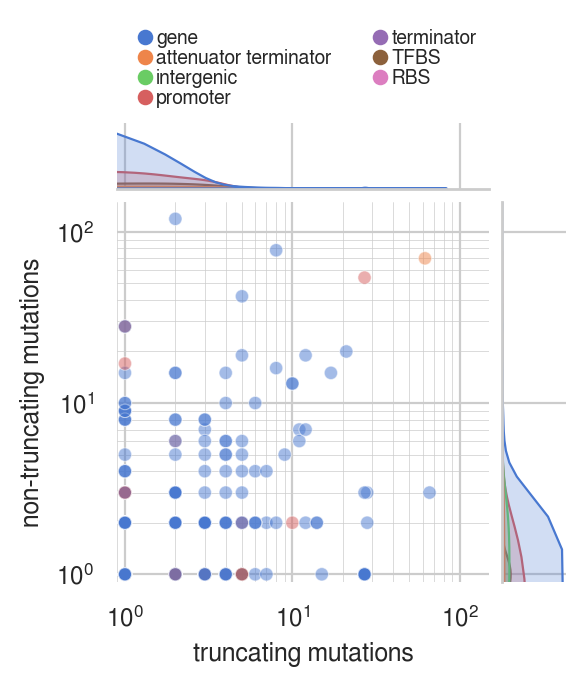

In [21]:
plt.rcParams["figure.dpi"] = 200

# jointplot won't work unless types are explicit
odf = df.copy()
odf["truncation"] = odf["truncation"].astype(int)
odf["other"] = odf["other"].astype(int)

g = sns.jointplot(
    data=odf,
    x="truncation",
    y="other",
    hue="feature type",
    height=3,
    alpha=0.5
)

# g.ax_joint.legend(
# #         loc='upper right',
#     bbox_to_anchor=(0.4, 1.05),
#     frameon=False,
#     fontsize=7,
#     ncol=2
# )

g.ax_joint.legend(
    bbox_to_anchor=(0., 1.2, 1., .102),
    loc=3,
    ncol=2,
    frameon=False,
    fontsize=7,
)

g.ax_joint.set_xlim(0.9,150)
g.ax_joint.set_ylim(0.9,150)
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')
g.ax_joint.xaxis.grid(True, "minor", linewidth=.25)
g.ax_joint.yaxis.grid(True, "minor", linewidth=.25)
sns.despine(ax=g.ax_joint, top=True, right=True, left=True, bottom=True)

g.ax_joint.set_xlabel("truncating mutations", fontsize=9)
g.ax_joint.set_ylabel("non-truncating mutations", fontsize=9)

g.savefig("../figs/gdmuts_f3s3.svg", format="svg")